In [72]:
#import everything and set dpi here

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 #set dpi for viewing figs within the notebook

import scipy.stats as stats

In [3]:
#directory = r"C:/Users/njana/Desktop/Behavior/MeAeffStim Results/May1523_MeAeffStim_simbaResults/" # include / at end
directory = r"C:/Users/njana/Desktop/Behavior/ESR1stim/" # include / at end

infofile = directory+"MasterDeets.csv"
infotable = pd.read_csv(infofile)

infotable

,name,type,BlindID,MouseID,Type,Day,Trial,stimdur,Total,startf,endf,trunc end,ethofile
0,Tr1,standard,NaN,FW4079,Chr2,1,1,30,43221,4825,43221,0,Hardware-July0523_ESRstim-Trial 1-Arena 1
1,Tr2,standard,NaN,FW4094,Chr2,1,2,30,43222,5209,43222,0,Hardware-July0523_ESRstim-Trial 2-Arena 1
2,Tr3,standard,NaN,FW4097,Chr2,1,3,30,43309,5255,43309,0,Hardware-July0523_ESRstim-Trial 3-Arena 1
3,Tr4,standard,NaN,FW4083,Chr2,1,4,30,43218,5367,43218,0,Hardware-July0523_ESRstim-Trial 4-Arena 1
4,Tr5,standard,NaN,FW4042,Chr2,1,5,30,43229,5632,43229,0,Hardware-July0523_ESRstim-Trial 5-Arena 1
5,Tr6,standard,NaN,FW4016,Chr2,1,6,30,43271,5224,43271,0,Hardware-July0523_ESRstim-Trial 6-Arena 1
6,D2Tr1,standard,NaN,FW4094,Chr2,2,1,30,43219,5679,43219,0,Hardware-July0623_ESRstimD2-Trial 1-Arena 1
7,D2Tr2,standard,NaN,FW4079,Chr2,2,2,30,43413,5345,43413,0,Hardware-July0623_ESRstimD2-Trial 2-Arena 1
8,D2Tr3,standard,NaN,FW4083,Chr2,2,3,30,43436,5016,43436,0,Hardware-July0623_ESRstimD2-Trial 3-Arena 1
9,D2Tr4,standard,NaN,FW4097,Chr2,2,4,30,43229,5520,43229,0,Hardware-July0623_ESRstimD2-Trial 4-Arena 1


In [ ]:
''' collect agg times '''
agg = []
for i in range(infotable.shape[0]):
    simbarawdata = pd.read_csv(directory+"/Day"+str(infotable.Day[i])+"/"+infotable.name[i]+".csv", header = 0)
    agg += [np.sum(simbarawdata["Aggression"])]

agg = np.array(agg)
agg = agg/30 # div by fps to convert to seconds
infotable["Agg"] = agg
infotable

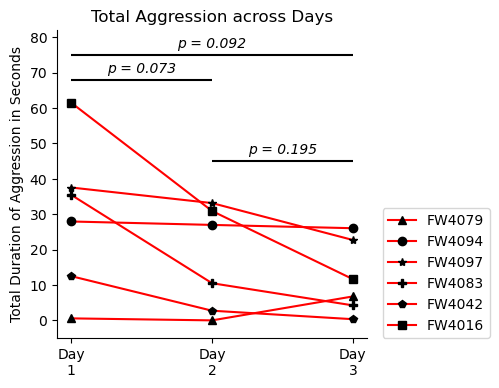

In [133]:
markers = ["^","o", "*", "P", "p", "s", "X", "d",  "V","1"]

for i, ele in enumerate(infotable['MouseID'].unique()):
    testdf = infotable[infotable.MouseID == ele]
    plt.plot(testdf.Day, testdf.Agg, color = 'r', marker = markers[i], mec = 'black', mfc = 'black', label = ele)

plt.legend(loc = (1.05,0))
sns.despine()
plt.gca().tick_params(axis='y', left=True)
plt.gca().tick_params(axis='x', bottom=True)
plt.title("Total Aggression across Days")
plt.ylabel("Total Duration of Aggression in Seconds")
plt.gcf().set_size_inches(4,4)
plt.xticks(ticks = [1,2,3], labels = ["Day\n1","Day\n2","Day\n3"])
plt.ylim(-5,82)

plt.hlines(68,1,2, color = 'black')
plt.text(1.5,70,"p = 0.073", horizontalalignment = 'center', style = 'italic')

plt.hlines(75,1,3, color = 'black')
plt.text(2,77,"p = 0.092", horizontalalignment = 'center', style = 'italic')

plt.hlines(45,2,3, color = 'black')
plt.text(2.5,47,"p = 0.195", horizontalalignment = 'center', style = 'italic')

plt.savefig(directory+"aggVSdays.png", dpi = 600, bbox_inches = "tight")
plt.savefig(directory+"aggVSdays.svg", dpi = 600, bbox_inches = "tight")

In [83]:
for ele in infotable['Day'].unique():
    testdf = infotable[infotable.Day == ele]
    print(stats.shapiro(testdf.Agg))

ShapiroResult(statistic=0.9753504991531372, pvalue=0.926251232624054)
ShapiroResult(statistic=0.8651801943778992, pvalue=0.2076592594385147)
ShapiroResult(statistic=0.9154090881347656, pvalue=0.4729255437850952)


In [116]:
day1 = infotable.sort_values(["Day","MouseID"]).Agg[:6].to_numpy()
day2 = infotable.sort_values(["Day","MouseID"]).Agg[6:12].to_numpy()
day3 = infotable.sort_values(["Day","MouseID"]).Agg[12:].to_numpy()
stats.ttest_rel(day1,day2)

TtestResult(statistic=2.2592487081851806, pvalue=0.07342078464955554, df=5)

In [117]:
stats.ttest_rel(day2,day3)

TtestResult(statistic=1.493651591876708, pvalue=0.1954908967760429, df=5)

In [119]:
stats.ttest_rel(day1,day3)

TtestResult(statistic=2.079377433852554, pvalue=0.09213478195236754, df=5)